0.8초 이상 진행될 경우 값 저장

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df1 = pd.read_csv('Liftoff_result/Level1.csv')
df2 = pd.read_csv('Liftoff_result/Level2.csv')
df3 = pd.read_csv('Liftoff_result/Level3.csv')
df4 = pd.read_csv('Liftoff_result/Level4.csv')
df5 = pd.read_csv('Liftoff_result/Level5.csv')
df6 = pd.read_csv('Liftoff_result/Level6.csv')
df7 = pd.read_csv('Liftoff_result/Level7.csv')
df8 = pd.read_csv('Liftoff_result/Level8.csv')

In [4]:
def extreme(df):
    df = df.loc[:, ['time', 'value']]
    arr = df.values.tolist()

    #csv의 모든 값 추출
    value_time = []
    value_cord = []
    for i in range(len(arr)):
        value_time.append(arr[i][0])
        value_cord.append(arr[i][1])

    temp = 0
    ext_value = []

    ext_time = []
    ext_cord = []

    #현재까지의 직선 그래프 추출
    def point_extreme(arr, i, temp):
        for j in range(temp, i):
            ext_time.append(arr[j][0])
            ext_cord.append(arr[j][1])    

    #극값 찾기
    for i in range(1, len(arr)):
        if arr[i][1] != arr[temp][1]:
            #If sum of time over 0.8s, save the value
            if(arr[i-1][0] - arr[temp][0] > 0.8):
                ext_value.append(arr[temp][1])
                point_extreme(arr, i, temp)
            temp = i
    return value_time, value_cord, ext_time, ext_cord, ext_value


In [5]:
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}

In [6]:
#문자열을 리스트 변수 명으로 만들 수 있는 방법은??
value_time_1, value_cord_1, ext_time_1, ext_cord_1, ext_value_1 = extreme(df1)
value_time_2, value_cord_2, ext_time_2, ext_cord_2, ext_value_2 = extreme(df2)
value_time_3, value_cord_3, ext_time_3, ext_cord_3, ext_value_3 = extreme(df3)
value_time_4, value_cord_4, ext_time_4, ext_cord_4, ext_value_4 = extreme(df4)
value_time_5, value_cord_5, ext_time_5, ext_cord_5, ext_value_5 = extreme(df5)
value_time_6, value_cord_6, ext_time_6, ext_cord_6, ext_value_6 = extreme(df6)
value_time_7, value_cord_7, ext_time_7, ext_cord_7, ext_value_7 = extreme(df7)
value_time_8, value_cord_8, ext_time_8, ext_cord_8, ext_value_8 = extreme(df8)

<function matplotlib.pyplot.show(close=None, block=None)>

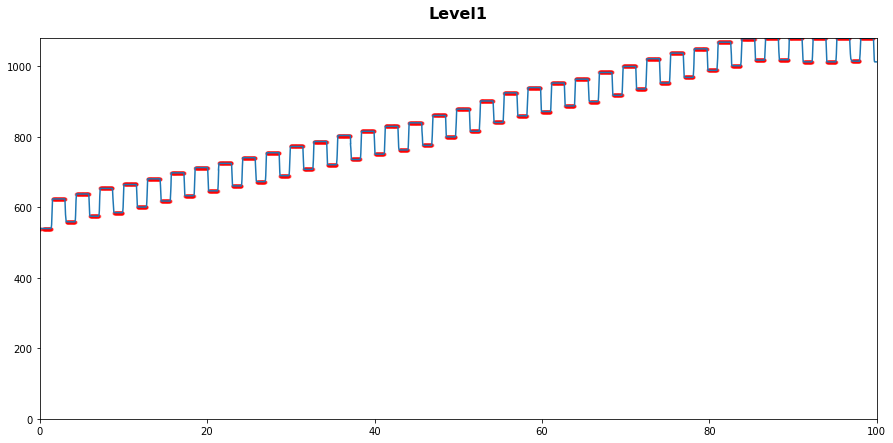

In [11]:
fig, ax = plt.subplots(figsize=(15,7))

plt.scatter(ext_time_1, ext_cord_1, alpha = 0.3, s = 3**2, c = 'red')
plt.plot(value_time_1, value_cord_1)
plt.xlim(0,100)
plt.ylim(0, 1080)
plt.title('Level1', fontdict=title_font, pad = 20)
plt.show

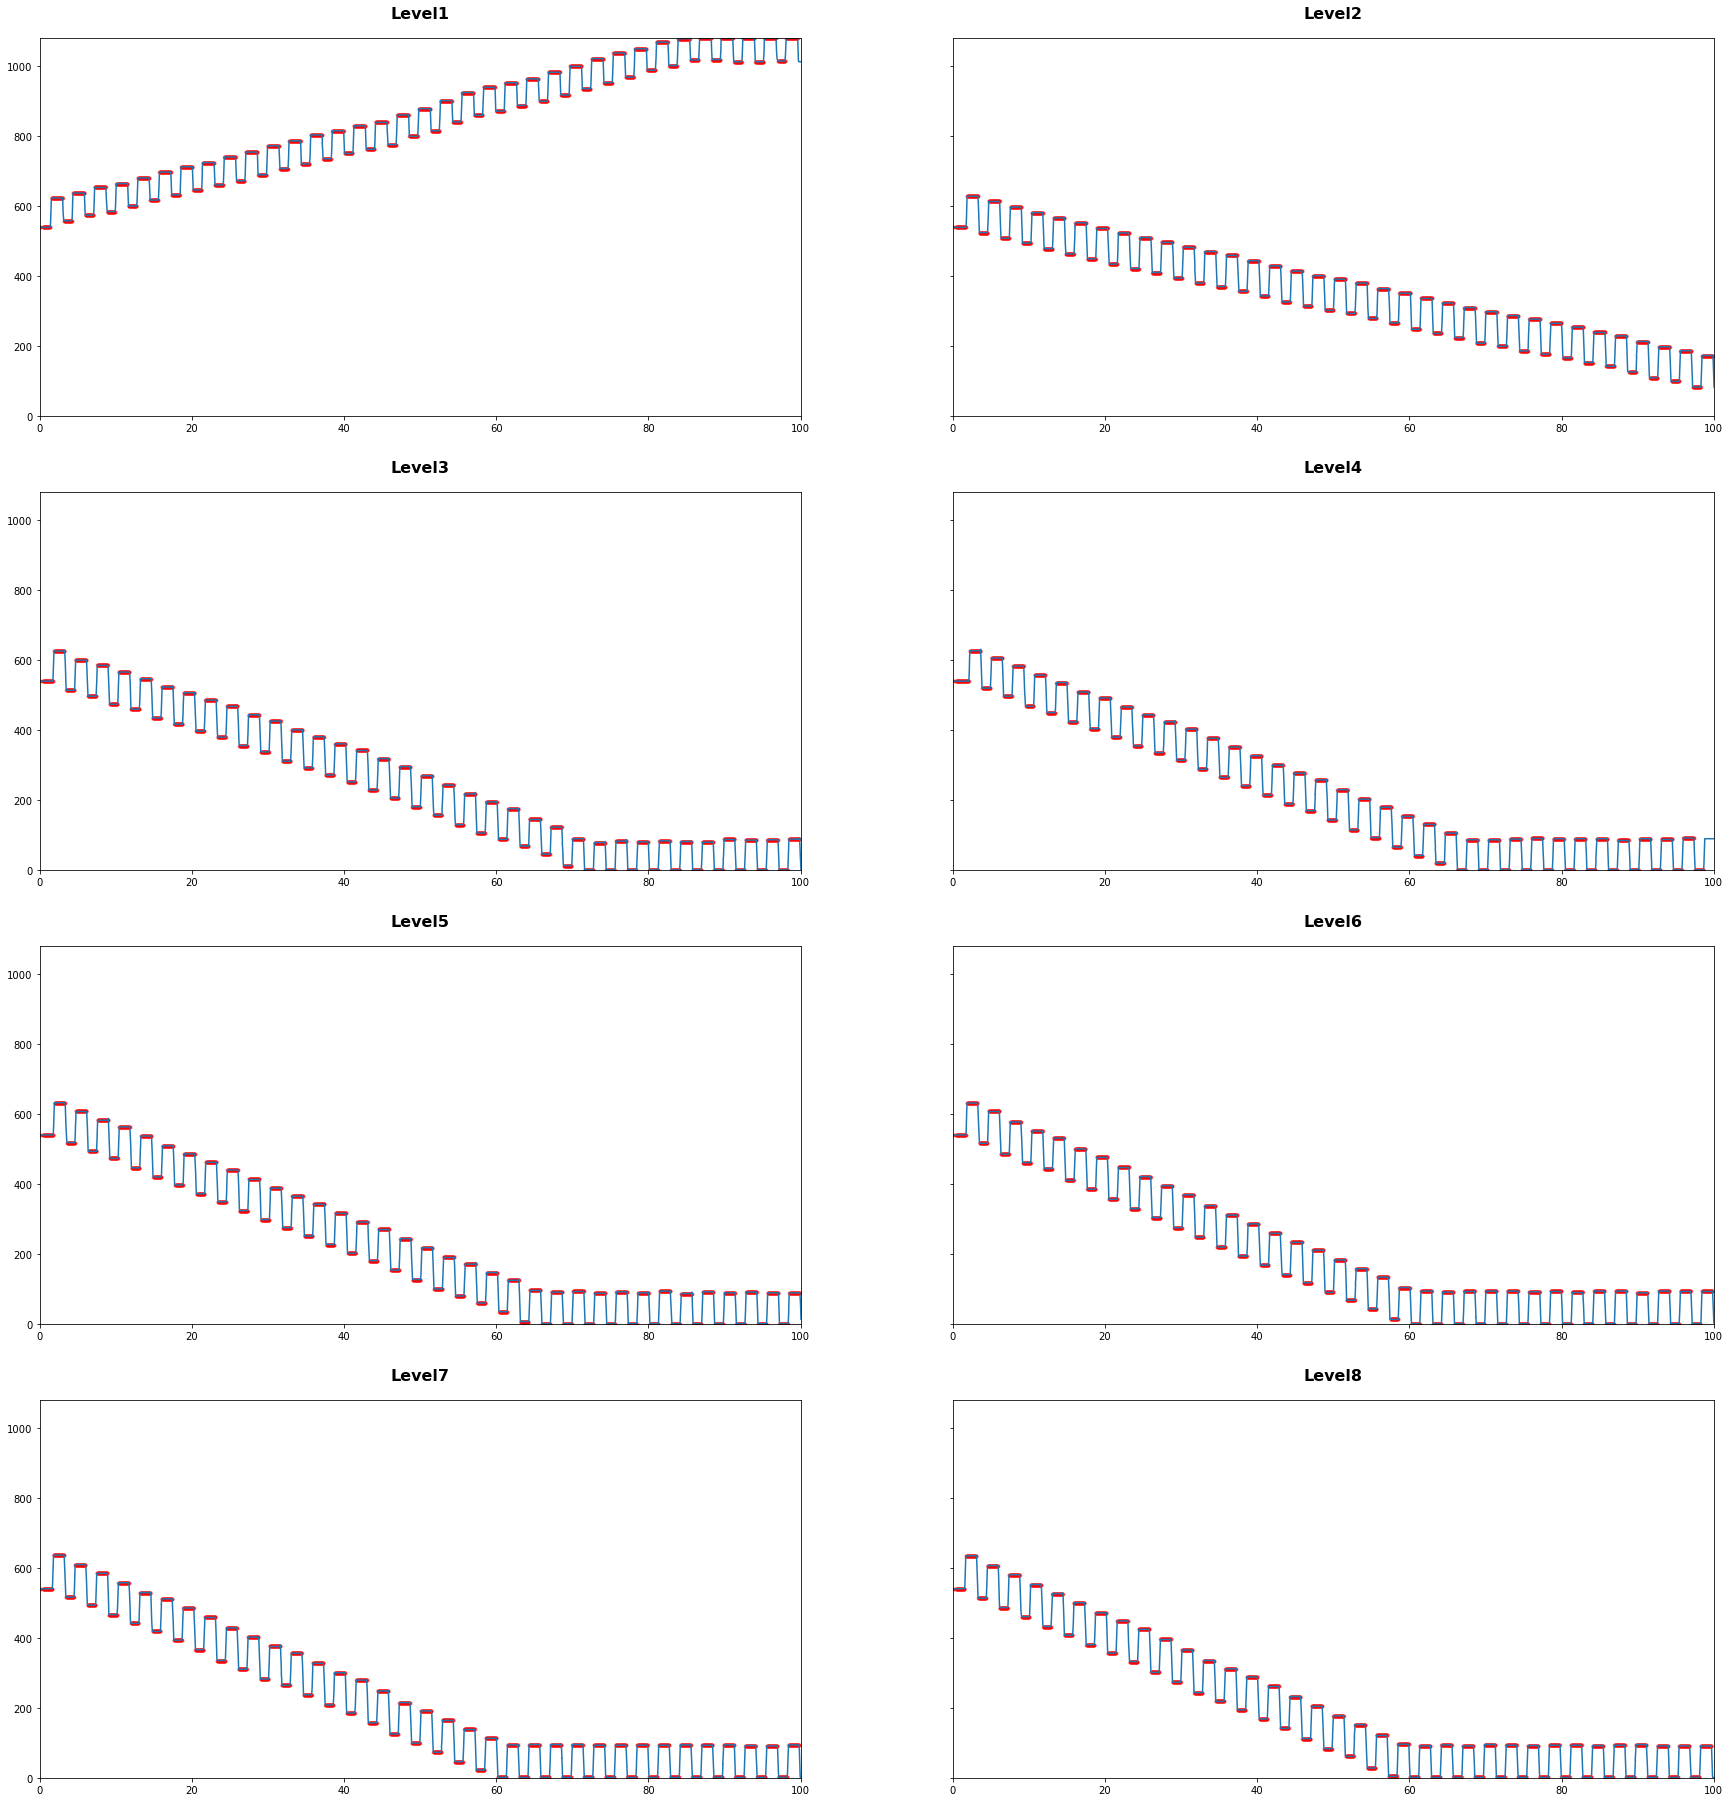

In [ ]:
fig, axs = plt.subplots(4, 2, sharey = 'row', figsize=(30,32))

axs[0,0].scatter(ext_time_1, ext_cord_1, alpha = 0.3, s = 3**2, c = 'red')
axs[0,0].plot(value_time_1, value_cord_1)
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0, 1080)
axs[0,0].set_title('Level1', fontdict=title_font, pad = 20)

axs[0,1].scatter(ext_time_2, ext_cord_2, alpha = 0.3, s = 3**2, c = 'red')
axs[0,1].plot(value_time_2, value_cord_2)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(0, 1080)
axs[0,1].set_title('Level2', fontdict=title_font, pad = 20)

axs[1,0].scatter(ext_time_3, ext_cord_3, alpha = 0.3, s = 3**2, c = 'red')
axs[1,0].plot(value_time_3, value_cord_3)
axs[1,0].set_xlim(0,100)
axs[1,0].set_ylim(0, 1080)
axs[1,0].set_title('Level3', fontdict=title_font, pad = 20)

axs[1,1].scatter(ext_time_4, ext_cord_4, alpha = 0.3, s = 3**2, c = 'red')
axs[1,1].plot(value_time_4, value_cord_4)
axs[1,1].set_xlim(0,100)
axs[1,1].set_ylim(0, 1080)
axs[1,1].set_title('Level4', fontdict=title_font, pad = 20)

axs[2,0].scatter(ext_time_5, ext_cord_5, alpha = 0.3, s = 3**2, c = 'red')
axs[2,0].plot(value_time_5, value_cord_5)
axs[2,0].set_xlim(0,100)
axs[2,0].set_ylim(0, 1080)
axs[2,0].set_title('Level5', fontdict=title_font, pad = 20)

axs[2,1].scatter(ext_time_6, ext_cord_6, alpha = 0.3, s = 3**2, c = 'red')
axs[2,1].plot(value_time_6, value_cord_6)
axs[2,1].set_xlim(0,100)
axs[2,1].set_ylim(0, 1080)
axs[2,1].set_title('Level6', fontdict=title_font, pad = 20)

axs[3,0].scatter(ext_time_7, ext_cord_7, alpha = 0.3, s = 3**2, c = 'red')
axs[3,0].plot(value_time_7, value_cord_7)
axs[3,0].set_xlim(0,100)
axs[3,0].set_ylim(0, 1080)
axs[3,0].set_title('Level7', fontdict=title_font, pad = 20)

axs[3,1].scatter(ext_time_8, ext_cord_8, alpha = 0.3, s = 3**2, c = 'red')
axs[3,1].plot(value_time_8, value_cord_8)
axs[3,1].set_xlim(0,100)
axs[3,1].set_ylim(0, 1080)
axs[3,1].set_title('Level8', fontdict=title_font, pad = 20)

plt.show()

![8](liftoff_n_coordinate.png)

In [ ]:
#마우스 이동 방향에 따른 이동 픽셀 구분

def ext_upndown(level, ext_value): 
    ext_up = []
    ext_down = []
    for i in range(len(ext_value) - 1):
        if ext_value[i] != ext_value[i+1]:
            # lift-UP
            if ext_value[i] < ext_value[i+1]:
                if ext_value[i+1] != 1080:
                    ext_up.append(ext_value[i+1] - ext_value[i])
            # lift-DOWN
            else:
                if ext_value[i+1] != 1:
                    ext_down.append(ext_value[i] - ext_value[i+1])

    updown = ['up']*len(ext_up) + ['down']*len(ext_down)
    ext_list = ext_up + ext_down
    level_list = [str(level)]*len(updown)
    ext_dict = {'Value' : ext_list, 'Direction' : updown, 'Level_of_LoD' : level_list}
    return ext_dict

In [ ]:
#seaborn violinplot으로 그리기 위해 csv 파일로 변환 필요 a

df_1 = pd.DataFrame(ext_upndown(1, ext_value_1))
df_2 = pd.DataFrame(ext_upndown(2, ext_value_2))
df_3 = pd.DataFrame(ext_upndown(3, ext_value_3))
df_4 = pd.DataFrame(ext_upndown(4, ext_value_4))
df_5 = pd.DataFrame(ext_upndown(5, ext_value_5))
df_6 = pd.DataFrame(ext_upndown(6, ext_value_6))
df_7 = pd.DataFrame(ext_upndown(7, ext_value_7))
df_8 = pd.DataFrame(ext_upndown(8, ext_value_8))

extreme_by_level = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8], ignore_index=True)

# df_3.to_csv('check_3.csv')

<Figure size 432x288 with 0 Axes>

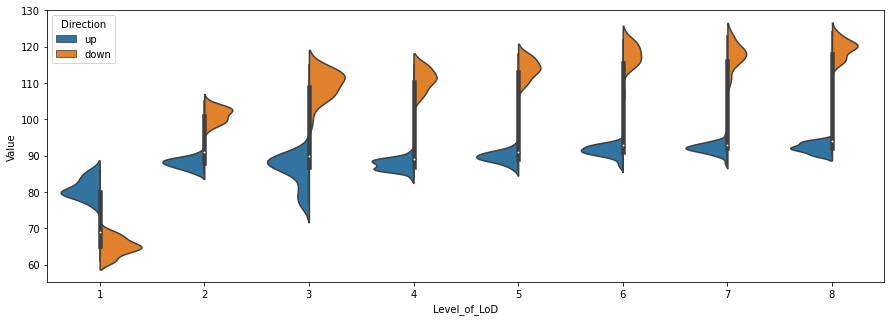

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.violinplot(x = "Level_of_LoD", y = "Value", data = extreme_by_level, hue = "Direction", split = True)
#plt.ylim([0, 150]) # y-axis 
plt.legend(loc='upper left', title = 'Direction')
plt.figure()